<a href="https://colab.research.google.com/github/kingsuching/lab-2-phase-1-kingsuching/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Sucheen_Sundaram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

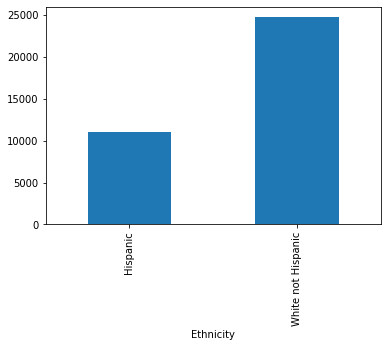

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
dds = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
dds.head()

dds[(dds["Ethnicity"] == "White not Hispanic") | (dds["Ethnicity"] == "Hispanic")].groupby("Ethnicity")["Expenditures"].mean().plot.bar()

**YOUR EXPLANATION HERE**

White residents spent much more per year on average, approximately $24K/year. This was close to double the mean annual spending of Hispanic residents.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

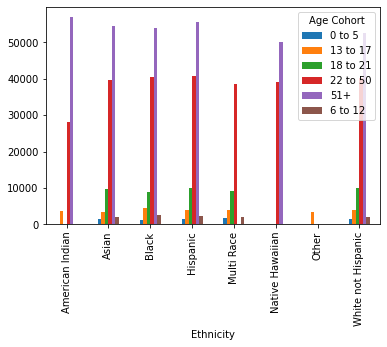

In [30]:
# YOUR CODE HERE
dds.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().unstack(1).sort_index().plot.bar()

**YOUR EXPLANATION HERE**

Based on this aggregated barplot, it appears that White and Hispanic residents spent a similar amount on average per year. This is an example of Simpson's Paradox since we lost the original finding of White residents spending almost twice more on average per year than Hispanics.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [55]:
# YOUR CODE HERE (although you may want to add more code cells)
meanWhite = dds.groupby("Ethnicity")["Expenditures"].mean()["White not Hispanic"]
meanHispanic = dds.groupby("Ethnicity")["Expenditures"].mean()["Hispanic"]
pd.crosstab(dds["Ethnicity"], dds["Age Cohort"], normalize=True).divide(dds["Age Cohort"].value_counts(normalize=True)), "===========================================================================================================", dds.groupby("Age Cohort")["Expenditures"].mean().sort_values(ascending=False)

(                      0 to 5  13 to 17  18 to 21  22 to 50       51+   6 to 12
 Ethnicity                                                                     
 American Indian     0.000000  0.004717  0.000000  0.004425  0.018868  0.000000
 Asian               0.097561  0.094340  0.206030  0.128319  0.122642  0.102857
 Black               0.036585  0.056604  0.045226  0.075221  0.066038  0.062857
 Hispanic            0.536585  0.485849  0.391960  0.190265  0.160377  0.520000
 Multi Race          0.085366  0.033019  0.010050  0.004425  0.000000  0.051429
 Native Hawaiian     0.000000  0.000000  0.000000  0.008850  0.009434  0.000000
 Other               0.000000  0.009434  0.000000  0.000000  0.000000  0.000000
 White not Hispanic  0.243902  0.316038  0.346734  0.588496  0.622642  0.262857,
 '===========================================================================================================',
 Age Cohort
 51+         53521.896226
 22 to 50    40209.283186
 18 to 21     9888.5376

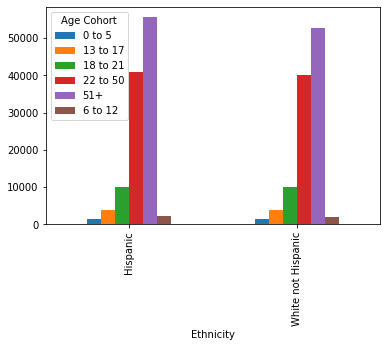

In [57]:
dds[(dds["Ethnicity"] == "White not Hispanic") | (dds["Ethnicity"] == "Hispanic")].groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().unstack(1).sort_index().plot.bar()

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

From the groupby summary object in the first code cell, we can see that the 51+ age cohort had the highest average spending per year. Furthermore, 58% of the 51+ age cohort was white which makes intuitive sense as to why the mean spending for that group was inflated so much.

As for the hispanic group, the 0-5 age group comprised the largest proportion of this ethnicity group (53.6%) which negatively impacts their mean annual spending since this age group has the lowest average annual spending.

Thus, the barplot may show that the Hispanic and White groups have very similar distributions, but from the conditional distribution table we can see that the drastic difference in proportions of each age group in every ethnicity explains the large gap in average spending for the White and Hispanic ethnicity cohorts.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.